# **Loan Eligibility Prediction**

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
#we will save a raw copy of the training set
raw = pd.read_csv('fairlearn.csv')

In [3]:
#Importing the training data
train = pd.read_csv('fairlearn.csv')
train.head(5)

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Eligible
0,LP001002,1.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,1.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


<AxesSubplot:>

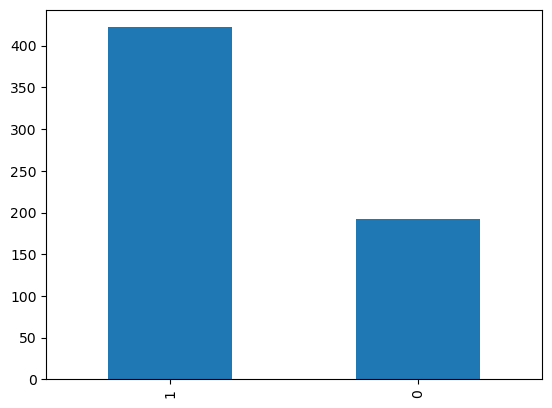

In [4]:
#Let's check some stats quickly
train['Eligible'].value_counts().plot.bar()

In [5]:
df = train.copy()
df['ApplicantIncome'][(df['Gender'] == 0) & (df['Eligible']==1)] = (df['ApplicantIncome'][(df['Gender'] == 0) & (df['Eligible']==1)])+10000

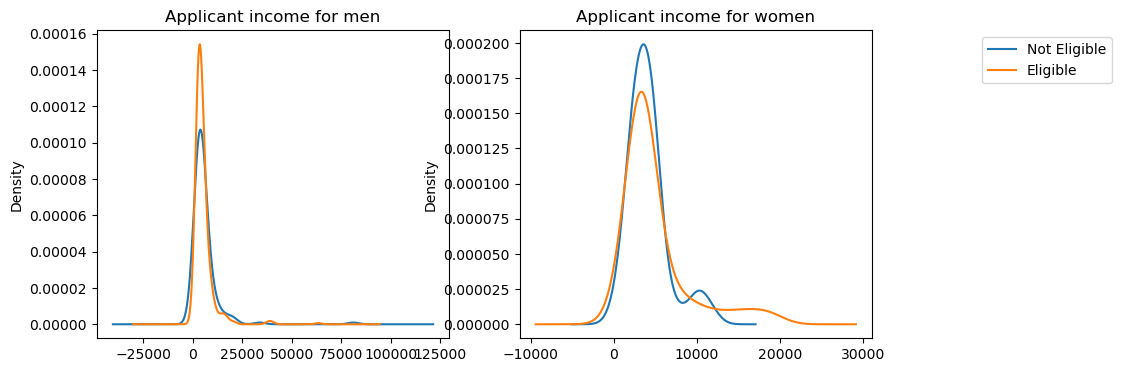

In [6]:
#Plot the distribution of Applicant income for both men and women

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

train['ApplicantIncome'][(train['Gender'] == 1) & (train['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax1, title='Applicant income for men')


train['ApplicantIncome'][(train['Gender'] == 1) & (train['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax1, title='Applicant income for men')

train['ApplicantIncome'][(train['Gender'] == 0) & (train['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax2, title='Applicant income for women')
train['ApplicantIncome'][(train['Gender'] == 0) & (train['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax2, title='Applicant income for women')
    
plt.legend(bbox_to_anchor=(1.7, 1))

plt.show()

### Make the applicant income feature important and add bias for women class

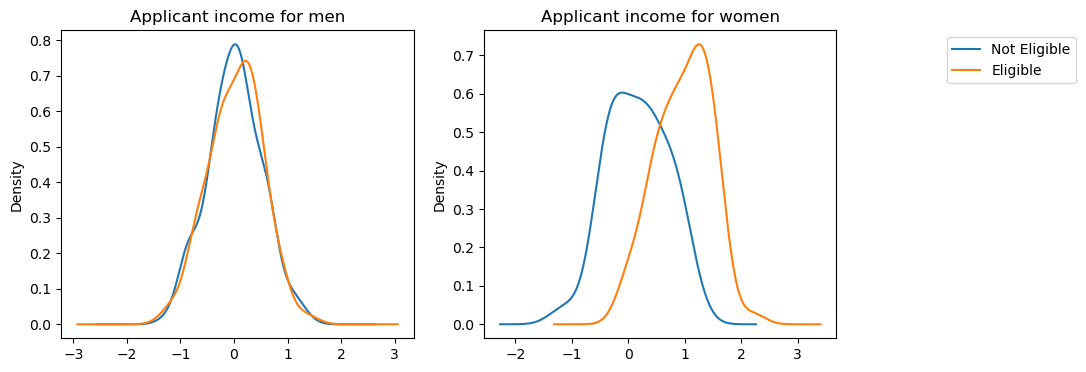

In [7]:
#We will add bias and normalize
train['ApplicantIncome'][train['Gender']==0] = train['Eligible'] + np.random.normal(scale=0.5, size=train.shape[0])
train.loc[train['Gender'] == 1, 'ApplicantIncome'] = np.random.normal(scale=0.5, size=train[train['Gender'] == 1].shape[0])

#Plot the distribution
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

train['ApplicantIncome'][(train['Gender'] == 1) & (train['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax1, title='Applicant income for men')
train['ApplicantIncome'][(train['Gender'] == 1) & (train['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax1, title='Applicant income for men')

train['ApplicantIncome'][(train['Gender'] == 0) & (train['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax2, title='Applicant income for women')
train['ApplicantIncome'][(train['Gender'] == 0) & (train['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax2, title='Applicant income for women')
    
plt.legend(bbox_to_anchor=(1.7, 1))

plt.show()

### Missing value imputation

In [8]:
#check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Graduate              0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Eligible              0
dtype: int64

Consider these methods to fill in the missing values:
* For numerical variables: imputation using mean or median 
* For categorical variables: imputation using mode

In the 'Loan_Amount_Term' variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable. i.e. 360

train['Loan_Amount_Term'].value_counts()

For the 'LoanAmount' variable, use mean or median to impute the missing values. We will use the median to fill the null values as 'LoanAmount' has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [9]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [10]:
#Confirm
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Eligible             0
dtype: int64

In [11]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Eligible
0,LP001002,1.0,No,0,Graduate,No,0.397027,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1.0,Yes,1,Graduate,No,-0.442070,1508.0,128.0,360.0,1.0,Rural,0


### Data Prep

In [12]:
#If you want to label encode 
#from sklearn import preprocessing
#encode = preprocessing.LabelEncoder()

#train['Dependents'] = encode.fit_transform(train.Dependents.values)
#train['Credit_History'] = encode.fit_transform(train.Credit_History.values)
#train['Married'] = encode.fit_transform(train.Married.values)
#train['Gender_Male'] = encode.fit_transform(train.Gender_Male.values)

In [13]:
#If you want to One-Hot Encode
#train = pd.get_dummies(train, columns=['Property_Area'])
#train = pd.get_dummies(train, columns=['Dependents'])

In [14]:
#Or just replace values for this exercise
train = train.replace({'Married':{'Yes':1,'No':0}})
train = train.replace({'Graduate':{'Graduate':1,'Not Graduate':0}})
train = train.replace({'Self_Employed':{'Yes':1,'No':0}})

train = train.astype({'Credit_History': 'int64'})
train = train.replace({'Dependents':{'0':0,'1':1,'2':2,'3+':3}})
train = train.astype({'Dependents':'int64'})
train = train.astype({'Loan_Amount_Term':'int64'})
train.dtypes

Loan_ID               object
Gender               float64
Married                int64
Dependents             int64
Graduate               int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Eligible               int64
dtype: object

In [15]:
#make sure no variables are of datatype 'object'
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Graduate           614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Eligible           614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [16]:
#We'll drop Loan_ID, Property_Area for now. We don't need them for this exercise.
train = train.drop(['Loan_ID','Property_Area','Married','Dependents','Graduate','Self_Employed','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'], axis=1)

### Let's use applicant income and Gender to predict eligibility for both Men and Women.

In [17]:
#this is our biased dataset
bdata = train[['Gender','ApplicantIncome','Eligible']]
#Save this biased dataset
bdata.to_csv('Biasdata.csv')
bdata.head()

,Gender,ApplicantIncome,Eligible
0,1.0,0.397027,1
1,1.0,-0.442070,0
2,1.0,-0.735451,1
3,1.0,0.223615,1
4,1.0,-0.012940,1


In [18]:
#Seperate the target vaiable
x = bdata.drop('Eligible',1)
y = bdata.Eligible
x.head()

,Gender,ApplicantIncome
0,1.0,0.397027
1,1.0,-0.442070
2,1.0,-0.735451
3,1.0,0.223615
4,1.0,-0.012940


In [19]:
#splitting the data in training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, stratify=x['Gender'], random_state=321)

## **1. Logistic Regression**

Let's train a logistic regression model on this biased dataset and check if the model learns patterns from this bias.

In [20]:
#Let's train a model on this baised dataset.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lrmodel = LogisticRegression()
lrmodel.fit(x_train, y_train)

LogisticRegression()

In [21]:
#Let’s predict the 'Eligibility' for testing set and calculate its accuracy.
lrpred = lrmodel.predict(x_test)
print('Overall model accuracy is', (accuracy_score(y_test, lrpred).round(3)))

Overall model accuracy is 0.686


## **Use Fairlearn**

In [24]:
!pip install --upgrade fairlearn raiwidgets

  Using cached fairlearn-0.8.0-py3-none-any.whl (235 kB)
  Using cached raiwidgets-0.29.0-py3-none-any.whl (2.6 MB)
  Using cached lightgbm-4.0.0-py3-none-win_amd64.whl (1.3 MB)
  Using cached erroranalysis-0.4.4-py3-none-any.whl (39 kB)
  Using cached responsibleai-0.29.0-py3-none-any.whl (149 kB)
  Using cached rai_core_flask-0.6.0-py3-none-any.whl (11 kB)
  Using cached Flask_Cors-4.0.0-py2.py3-none-any.whl (14 kB)
  Using cached gevent-23.7.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached econml-0.14.1-cp39-cp39-win_amd64.whl (937 kB)
  Using cached ml_wrappers-0.4.11-py3-none-any.whl (47 kB)
  Using cached ipykernel-6.8.0-py3-none-any.whl (128 kB)
  Using cached interpret_community-0.29.0-py3-none-any.whl (130 kB)
  Using cached statsmodels-0.13.5-cp39-cp39-win_amd64.whl (9.2 MB)
  Using cached shap-0.41.0-cp39-cp39-win_amd64.whl (435 kB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.0
    Uninstalling statsmodels-0.14.0:
      Successfully

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
explainerdashboard 0.4.2.2 requires scikit-learn>=1.1, but you have scikit-learn 1.0.2 which is incompatible.


In [26]:
x_test.head()

,Gender,ApplicantIncome
263,Female,0.920230
583,Male,0.404797
258,Male,0.221684
28,Male,-0.892349
86,Male,0.275091


In [25]:
#for understanding
x_test = x_test.replace({'Gender':{1:'Male',0:'Female'}})

#fairlearn metrics
from fairlearn.metrics import MetricFrame, selection_rate
acc = MetricFrame(metrics=accuracy_score, y_true=y_test, y_pred=lrpred, sensitive_features=x_test['Gender'])

print('Overall Accuracy:', (acc.overall).round(3))
print('\nAccuracy by group:', acc.by_group)

Overall Accuracy: 0.686

Accuracy by group: Gender
Female    0.705882
Male      0.682119
Name: accuracy_score, dtype: float64


This tells us that the model predicts loan eligibility with 71% accuracy for **Females** and  only 68% accuracy for **Males**. 

<AxesSubplot:>

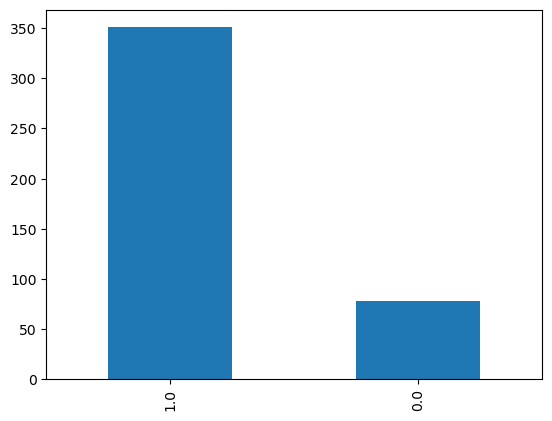

In [27]:
#Let's check some stats quickly
x_train['Gender'].value_counts().plot.bar()

That is mostly because the model has learned the bias of applicant income  for females. The records for Male applicants in the `x_train` dataset are higher than those of Females applicants. Ideally the model should learn better about the male applicants and make better predictions for males than females. 

This shows how easily a model gets influenced by bias.


However, in probems like this where there is class imbalance, simply `accuracy` is not enough. We have to evaluate a model based on `selection rate`, `precision`, and `recall`

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
metrics = {'recall': recall_score,
           'precision': precision_score}

In [29]:
group_metrics = MetricFrame(metrics=metrics,
                             y_true=y_test,
                             y_pred=lrpred,
                             sensitive_features=x_test['Gender'])

In [30]:
print('Overall Metrics:')
print('Recall:', recall_score(y_test, lrpred).round(2))
print('Precision:', precision_score(y_test, lrpred).round(2))
print('\nMetrics by Group:')
print(group_metrics.by_group)

Overall Metrics:
Recall: 1.0
Precision: 0.69

Metrics by Group:
        recall  precision
Gender                   
Female     1.0   0.705882
Male       1.0   0.682119


**1. Recall** indicates the proportion of eligible (i.e. 1) cases that were correctly identified by the model. In other words, of all the applicants who are actually eligible, how many did the model find? The model does a better job at this for both male and female applicants, even though there is a class imbalance. The bias is helping the female class.

**Question why?** In this case, the model was easily able to learn because of the bias and was able to identify female eligibility easily.



---



**2. Precision** identifies what proportion of eligible predictions was actually correct? In other words, when it predicts that an applicant is eligible, it is correct 69% of the time (overall). The precision for female group is better than the precision for male group.

**Question why?** In this case, we know the answer. The model was easily able to learn because of the bias and was able to identify female eligibility precisely.
